### Contents

Import Data

Data Cleaning

Data Prep for Regression Analysis

Regression Analysis

### Import Data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# ensure graphs are shown inline
%matplotlib inline

In [3]:
# create path
path = r'/Users/kaitlinkendrick/Documents/Data Analysis/Craft Beer Analysis'

In [4]:
# import data
beer = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'clean_products_merged.csv'), index_col = False)

### Data Cleaning

In [5]:
beer.columns

Index(['Unnamed: 0', 'Product_code', 'Vendor_code', 'Name', 'Retail_price',
       'Base_unit', 'Country_of_Origin', 'Size', 'ABV', 'Amount',
       'Sale_amount', 'Discount_amount', 'Profit', 'Missing_price',
       'Missing_vendor', 'Missing_unit', 'Missing_country', 'Missing_size',
       'Missing_ABV', 'Missing_amount', 'Missing_sale', 'Missing_discount',
       'Missing_profit'],
      dtype='object')

In [6]:
beer.head()

,Unnamed: 0,Product_code,Vendor_code,Name,Retail_price,Base_unit,Country_of_Origin,Size,ABV,Amount,...,Missing_price,Missing_vendor,Missing_unit,Missing_country,Missing_size,Missing_ABV,Missing_amount,Missing_sale,Missing_discount,Missing_profit
0,0,5028,NaN,1 Symbiotica Apple 0.375,300.0,Pieces,RUS,0.375,4.5,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,5028,NaN,1 Symbiotica Apple 0.375,300.0,Pieces,RUS,0.375,4.5,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,5028,NaN,1 Symbiotica Apple 0.375,300.0,Pieces,RUS,0.375,4.5,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4846,NaN,1 Symbiotica Hard Kombucha Renegade Aronia 0.33,200.0,Pieces,RUS,0.330,3.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4846,NaN,1 Symbiotica Hard Kombucha Renegade Aronia 0.33,200.0,Pieces,RUS,0.330,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
beer.shape

(51442, 23)

In [8]:
# drop unneeded columns
beer2 = beer.drop(['Vendor_code', 'Missing_price', 'Missing_vendor', 'Missing_unit', 'Missing_country', 'Missing_size', 'Missing_ABV', 'Missing_amount', 
           'Missing_sale', 'Missing_discount', 'Missing_profit'], axis = 1)

In [9]:
# find and remove missing data
beer2.isnull().sum()

Unnamed: 0               0
Product_code             0
Name                     0
Retail_price           437
Base_unit              404
Country_of_Origin     8954
Size                  6344
ABV                   6359
Amount                1358
Sale_amount           1409
Discount_amount      11560
Profit                1372
dtype: int64

In [10]:
beer2.dropna(subset = ['Amount', 'Retail_price'], inplace=True)

In [11]:
beer2.isnull().sum()

Unnamed: 0               0
Product_code             0
Name                     0
Retail_price             0
Base_unit                0
Country_of_Origin     8506
Size                  5833
ABV                   5847
Amount                   0
Sale_amount             51
Discount_amount      10202
Profit                  14
dtype: int64

In [12]:
beer2

,Unnamed: 0,Product_code,Name,Retail_price,Base_unit,Country_of_Origin,Size,ABV,Amount,Sale_amount,Discount_amount,Profit
0,0,5028,1 Symbiotica Apple 0.375,300.0,Pieces,RUS,0.375,4.5,2.00,420.00,180.00,140.00
1,1,5028,1 Symbiotica Apple 0.375,300.0,Pieces,RUS,0.375,4.5,4.00,960.00,240.00,400.00
2,2,5028,1 Symbiotica Apple 0.375,300.0,Pieces,RUS,0.375,4.5,5.00,1440.00,60.00,740.00
3,3,4846,1 Symbiotica Hard Kombucha Renegade Aronia 0.33,200.0,Pieces,RUS,0.330,3.0,4.00,412.23,277.77,52.23
4,4,4846,1 Symbiotica Hard Kombucha Renegade Aronia 0.33,200.0,Pieces,RUS,0.330,3.0,2.00,360.00,40.00,180.00
...,...,...,...,...,...,...,...,...,...,...,...,...
51435,51435,1861,Stoun Imperial Rashn Stout Barrel l,1200.0,Liters,NaN,1.000,10.8,1.25,1468.60,31.40,600.16
51436,51436,1861,Stoun Imperial Rashn Stout Barrel l,1200.0,Liters,NaN,1.000,10.8,0.25,209.87,90.13,36.18
51437,51437,4724,Semjuel Adams Boston Lager Barrel,720.0,Liters,NaN,1.000,4.8,10.25,7040.55,339.45,3637.55
51438,51438,4724,Semjuel Adams Boston Lager Barrel,720.0,Liters,NaN,1.000,4.8,13.25,8854.37,685.63,4455.37


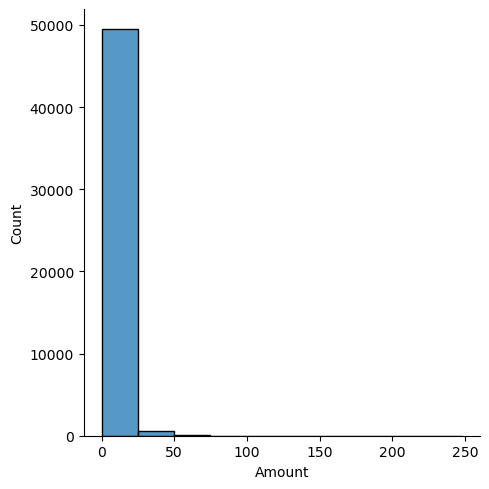

In [13]:
# check for extreme values
sns.displot(beer2['Amount'], bins=10)

In [14]:
# create and remove subset of Amount over 50
beer3 = beer2[beer2['Amount'] > 50]

In [15]:
beer3

,Unnamed: 0,Product_code,Name,Retail_price,Base_unit,Country_of_Origin,Size,ABV,Amount,Sale_amount,Discount_amount,Profit
4563,4563,2461,Ayinger Urvajsse Barrel,720.0,Liters,Germany,1.00,5.8,58.900,41726.80,681.20,25234.80
5876,5876,2596,Beijing Beer 0.63,300.0,Pieces,NaN,0.63,3.3,60.000,7978.46,1.54,58.46
20381,20381,3311,Gaffel Kolsch Barrel30,720.0,Liters,Germany,1.00,4.8,81.850,55828.47,3103.53,33352.46
20383,20383,3311,Gaffel Kolsch Barrel30,720.0,Liters,Germany,1.00,4.8,58.650,40294.65,1933.35,24189.35
20401,20401,3311,Gaffel Kolsch Barrel30,720.0,Liters,Germany,1.00,4.8,56.050,30212.00,3844.00,14820.68
21641,21641,4605,Hausmann Berlin white,560.0,Liters,RUS,1.00,4.5,50.050,25548.81,2479.19,13036.31
22546,22546,310,Huyghe / Delirium Red / fruit beer / 8%,800.0,Liters,BEL,1.00,8.0,76.350,58184.07,2915.93,30698.07
23369,23369,296,"Jaws American Pale Ale / APA / 5.5% / 0,5 but",220.0,Pieces,RUS,0.50,5.5,69.000,14123.19,1056.81,7292.19
23444,23444,296,"Jaws American Pale Ale / APA / 5.5% / 0,5 but",220.0,Pieces,RUS,0.50,5.5,51.000,9788.80,931.20,4739.80
23462,23462,296,"Jaws American Pale Ale / APA / 5.5% / 0,5 but",220.0,Pieces,RUS,0.50,5.5,57.000,11727.64,812.36,5776.84


In [16]:
beer3.shape

(54, 12)

In [17]:
beer4 = beer2.drop(beer3.index)

In [18]:
beer4.shape

(50027, 12)

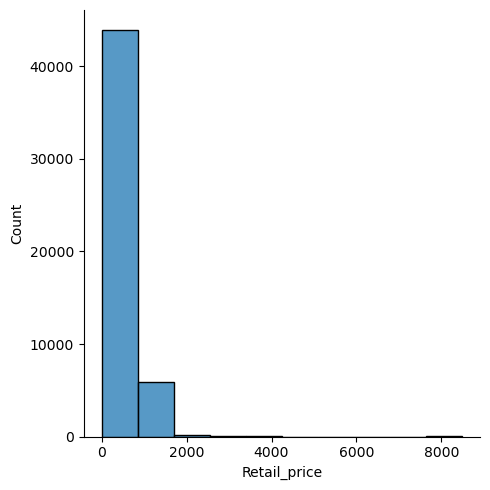

In [19]:
sns.displot(beer4['Retail_price'], bins=10)

In [20]:
# create and remove subset of Retail_price over 4000
beer5 = beer4[beer4['Retail_price'] > 4000]

In [21]:
beer5.shape

(18, 12)

In [22]:
beer6 = beer4.drop(beer5.index)

In [23]:
beer6.shape

(50009, 12)

### Data Prep for Regression Analysis

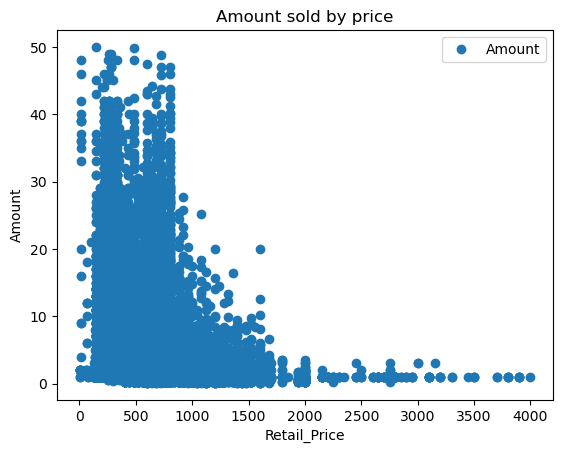

In [24]:
# create scatterplot for variables to look at
beer6.plot(x = 'Retail_price', y='Amount',style='o') 
plt.title('Amount sold by price')  
plt.xlabel('Retail_Price')  
plt.ylabel('Amount')  
plt.show()

Hypothesis: Cheaper beer sells more

In [25]:
# reshape variables into numpy arrays
X = beer6['Retail_price'].values.reshape(-1,1)
y = beer6['Amount'].values.reshape(-1,1)

In [26]:
X

array([[300.],
       [300.],
       [300.],
       ...,
       [720.],
       [720.],
       [720.]])

In [27]:
y

array([[ 2.  ],
       [ 4.  ],
       [ 5.  ],
       ...,
       [10.25],
       [13.25],
       [ 1.  ]])

In [28]:
# split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Regression Analysis

In [29]:
# create regression object
regression = LinearRegression()

In [30]:
# fit regression object into training set
regression.fit(X_train, y_train)

LinearRegression()

In [31]:
# predict values of y using x
y_predicted = regression.predict(X_test)

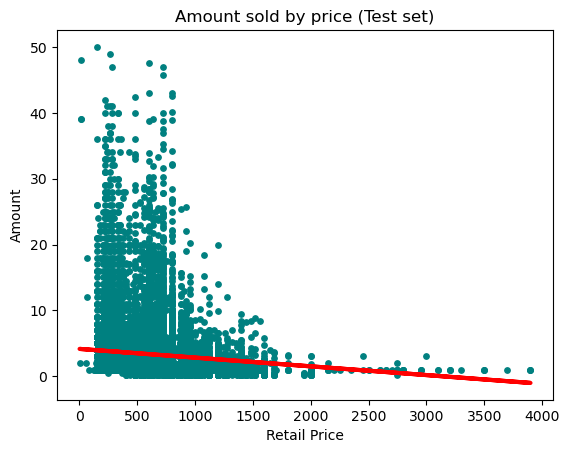

In [32]:
# create plot that shows results of prediction
plot_test = plt
plot_test.scatter(X_test, y_test, color='teal', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Amount sold by price (Test set)')
plot_test.xlabel('Retail Price')
plot_test.ylabel('Amount')
plot_test.show()

This is a very flat model with a slight downwards trend, it seems to me that retail price has a slight effect on the amount of beer sold

In [33]:
# create objects that contain model summary statistics
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [34]:
# print model summary statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00132478]]
Mean squared error:  22.530325594212105
R2 score:  0.00704361272482068


In [35]:
y_predicted

array([[3.62507049],
       [3.66481401],
       [3.71780538],
       ...,
       [3.89002732],
       [3.7575489 ],
       [3.71780538]])

In [36]:
# compare actual and predicted results 
model1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
model1.head(30)

,Actual,Predicted
0,2.00,3.625070
1,5.00,3.664814
2,1.00,3.717805
3,2.00,3.691310
4,1.00,3.598575
5,1.00,3.068661
6,3.00,3.956267
7,2.00,3.810540
8,1.00,3.426353
9,18.00,3.664814


Each of the model summary statistics imply that the model is not performing well. The slope is slightly negative (sitting at -0.01) which shows that there is a very slight downward line. The MSE is a very large number and the R2 score is quite below 0, both of these statistics showing a poor performing model. Additionally, many of the predicted and actual results are far off. The model isn't performing well because there isn't a single, straight regression line. There is no bias I can see if this dataset and so it appears to me that there isn't a correlation between retail price and amount of beer sold, therefore my hypothesis is null. 